In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as datetime

In [3]:
#Reading Dataset and Checking top 5 entries
data = pd.read_csv("D:\Data Science\Datasets\Task 2 ML Data.csv")
data.head()

,Date,NO2,CO,O3,PM2.5,SO2,AQI Value,WIND,TEMP,PRESSURE,RH
0,1/1/2010,38.16,0.704,0.03348,13.526531,7.7,54,5.854167,46.000000,1030.041667,65.916667
1,1/2/2010,37.10,0.880,0.03996,14.953061,14.7,57,2.970833,44.000000,1028.208333,63.291667
2,1/3/2010,38.16,0.440,0.02484,15.428571,21.7,58,3.579167,44.041667,1025.833333,69.625000
3,1/4/2010,26.50,0.440,0.03348,10.800000,32.9,47,6.891667,41.750000,1031.208333,60.166667
4,1/5/2010,45.58,0.616,0.03348,15.904082,34.3,59,2.233333,37.333333,1032.125000,59.916667


In [5]:
#Understanding rows and columns
data.shape
data.info()
print ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        365 non-null    object 
 1   NO2         365 non-null    float64
 2   CO          365 non-null    float64
 3   O3          365 non-null    float64
 4   PM2.5       365 non-null    float64
 5   SO2         365 non-null    float64
 6    AQI Value  365 non-null    int64  
 7   WIND        365 non-null    float64
 8   TEMP        365 non-null    float64
 9   PRESSURE    365 non-null    float64
 10  RH          365 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 30.0+ KB



In [6]:
# Null Values if any
data.isna().sum()

Date          0
NO2           0
CO            0
O3            0
PM2.5         0
SO2           0
 AQI Value    0
WIND          0
TEMP          0
PRESSURE      0
RH            0
dtype: int64

In [8]:
df = data.copy()
#Removing spaces from dataset
df = df.rename(columns = lambda x: x.strip())
df['Date'] = pd.to_datetime(df["Date"])

df.describe()

,NO2,CO,O3,PM2.5,SO2,AQI Value,WIND,TEMP,PRESSURE,RH
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,34.949008,0.506301,0.046087,13.626266,13.476947,63.747945,4.538818,68.747160,1016.835502,67.835502
std,16.596962,0.294035,0.016503,4.748510,11.535875,28.919593,1.903770,14.415286,5.656928,11.991668
min,7.420000,0.176000,0.015120,4.560000,0.000000,25.000000,1.204167,28.125000,1000.666667,24.458333
25%,22.260000,0.264000,0.034560,10.320000,4.900000,45.000000,3.008333,57.375000,1013.416667,62.416667
50%,31.800000,0.440000,0.043200,13.051020,9.800000,56.000000,4.145833,71.250000,1016.250000,69.041667
75%,44.520000,0.528000,0.054000,16.379592,18.900000,67.000000,5.716667,81.583333,1020.083333,75.500000
max,111.571429,1.760000,0.096857,34.924490,72.612245,179.000000,11.883333,89.125000,1038.208333,92.458333


### Correlation of features

<AxesSubplot:>

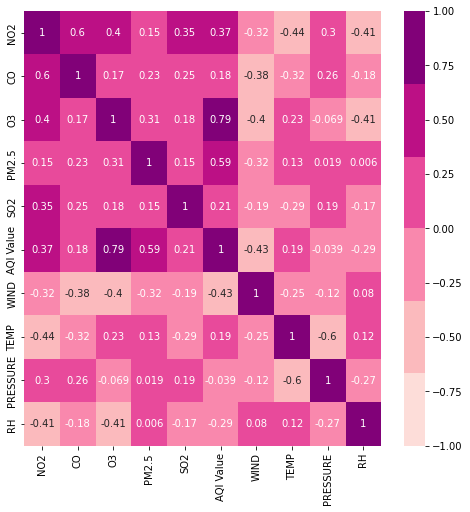

In [15]:
# correlation Matrix
corr = df.corr()

# plot heatmap
plt.subplots(figsize=(8,8))
colormap = sns.color_palette("RdPu")
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
           annot = True, center =0, vmin =-1, cmap = colormap)

In [17]:
#Split Data
# AQI is the output so it will be on y
X = df.drop('AQI Value', axis = 1)
y = df['AQI Value']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
# Feature Selection
# dropping date and time 
X_test = X_test.drop('Date', axis =1)
X_train = X_train.drop("Date", axis =1)
X_train = X_train.drop(['RH', "PRESSURE"], axis=1)
X_test = X_test.drop(['RH', "PRESSURE"], axis=1)

In [20]:
#Importing Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fitting the training dataset
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
#Print the coeffiecient of each feature in trained model
print(lr.coef_)

[ 1.33156703e-01 -1.09998655e+01  1.04613689e+03  2.44883769e+00
  1.38217591e-01 -1.16243818e+00 -2.78574887e-02]


In [23]:
# Intercept on the "AQI Value" 
print(lr.intercept_)
y_pred = lr.predict(X_test)
error = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}, columns=
                    ['Actual', 'Predicted'])


-11.798415366757567


In [24]:
print(error)

     Actual   Predicted
92       97  105.617288
175      44   53.192081
63       58   76.210379
67       56   60.392136
141      30   25.436801
..      ...         ...
354      60   64.111360
227      53   65.757839
237      81  116.103820
352      54   55.027302
56       52   54.009764

[110 rows x 2 columns]


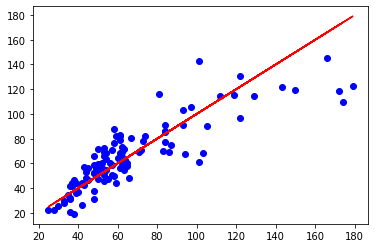

In [26]:
plt.plot(y_test, y_test, 'r-')
plt.scatter(y_test, y_pred, c='b')

In [27]:
#Training the model using trian daatset
# Performace Metrix, MSE, MAE, RMSE and Rsquared

In [28]:
from sklearn import metrics
print('MAE = {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE = {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE = {}'.format(np.sqrt(metrics.mean_absolute_error(y_test, y_pred))))
print('R_squared = {}'.format(metrics.r2_score(y_test, y_pred)))

MAE = 11.63523557660938
MSE = 271.8414887223958
RMSE = 3.4110461117682624
R_squared = 0.7371350453380403
